In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DB.DBHandler import DBHelper
import numpy as np

In [74]:
sns.set_theme(style="ticks", color_codes=True)
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
db = DBHelper()

In [18]:
df = pd.read_sql_query(
    """
SELECT ExpenseCategory.name, sum(price * quantity) AS 'total' FROM Expense JOIN ExpenseCategory ON Expense.category=ExpenseCategory._id WHERE date BETWEEN '2022-05-04' AND '2022-05-06' GROUP BY category;
""",
    db.conn,
)
df.head()

,name,total
0,Legume,831.0
1,Boissons,22369.0
2,Pates,600.0
3,evenement,1720.0
4,Emballage,2.0


<AxesSubplot:xlabel='total', ylabel='name'>

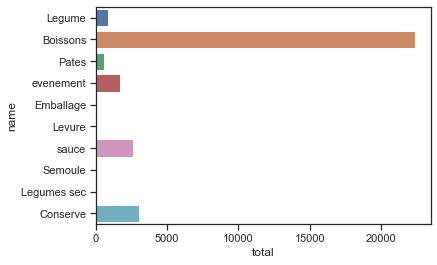

In [20]:
sns.barplot(y="name", x="total", data=df)

In [11]:
df = pd.read_sql_query(
    """
SELECT sum(price * quantity) AS total FROM Expense WHERE date BETWEEN '2022-05-04' AND '2022-05-06';
""",
    db.conn,
)
df.head()

,total
0,32584.0


In [12]:
df = pd.read_sql_query(
    
"""
SELECT sum(total) AS total FROM Sells WHERE date BETWEEN '2022-05-04' AND '2022-05-06';
""",
    db.conn,
)
df.head()

,total
0,3200.0


In [13]:
df = pd.read_sql_query(
    """
SELECT sum(amount) AS total FROM Payment WHERE date BETWEEN '2022-05-04' AND '2022-05-06';
""",
    db.conn,
)
df.head()

,total
0,None


In [47]:
df = pd.read_sql_query(
    """
SELECT Expense.date, ExpenseCategory.name AS category, Expense.quantity, Expense.price FROM Expense JOIN ExpenseCategory ON Expense.category=ExpenseCategory._id;
""",
    db.conn,
)
df.head()

,date,category,quantity,price
0,2022-05-04 02:20:00,Boissons,38.0,57.0
1,2022-05-04 02:20:00,Boissons,23.0,57.0
2,2022-05-04 02:20:00,Boissons,52.0,57.0
3,2022-05-04 02:20:00,Boissons,26.0,57.0
4,2022-05-04 02:20:00,Boissons,16.0,57.0


In [48]:
df['date'] = pd.to_datetime(df.date)
df['total'] = df.quantity * df.price
df['day'] = df.date.dt.day_name()
df['month'] = df.date.dt.month_name()
df['year'] = df.date.dt.year

In [56]:
df.day.unique()

array(['Wednesday', 'Sunday', 'Monday', 'Thursday'], dtype=object)

<AxesSubplot:xlabel='quantity', ylabel='day'>

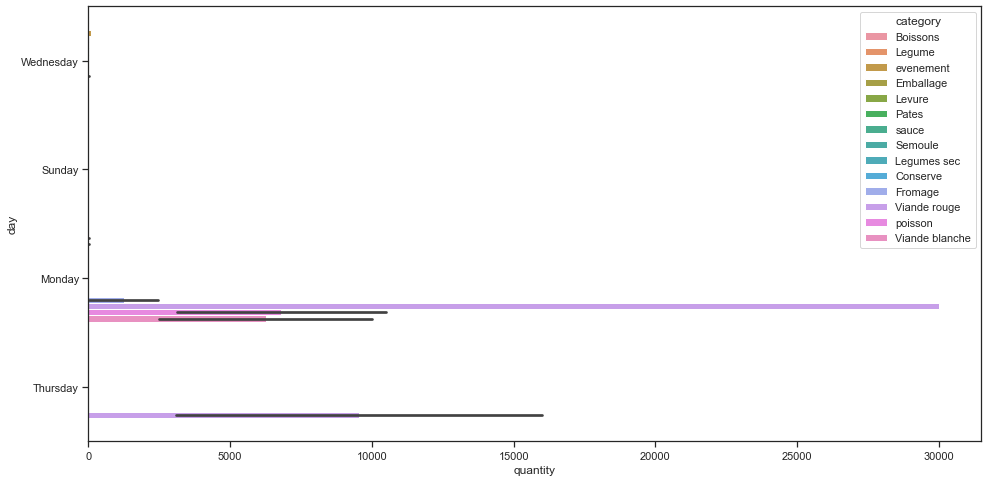

In [58]:
sns.barplot(y="day", x="quantity", data=df, hue="category")

In [94]:
df['date'] = pd.to_datetime(df.date)
df['hour'] = df.date.dt.hour
df['day'] = df.date.dt.day_name()
df['month'] = df.date.dt.month_name()
df['year'] = df.date.dt.year

In [ ]:
df.head()

In [61]:
df.day.unique()

array(['Wednesday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

<AxesSubplot:xlabel='total', ylabel='month'>

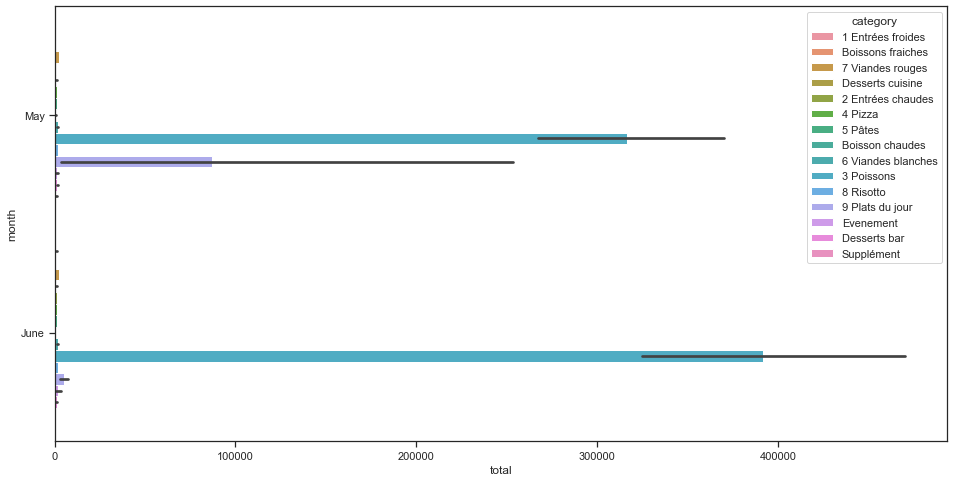

In [64]:
sns.barplot(y="month", x="total", data=df, hue="category")

In [102]:
df = pd.read_sql_query(
    """
SELECT date, nb_covers, total FROM Sells;
""",
    db.conn,
)
df.head()

,date,nb_covers,total
0,2022-05-04 21:42:13,4,1500.0
1,2022-05-04 21:52:26,2,1700.0
2,2022-05-06 16:39:39,2,1500.0
3,2022-05-06 16:40:59,2,2400.0
4,2022-05-06 16:41:38,1,100.0


In [103]:
df['date'] = pd.to_datetime(df.date)
df['total_by_person'] = df.total / df.nb_covers
df['hour'] = df.date.dt.hour
df['day'] = df.date.dt.day_name()
df['month'] = df.date.dt.month_name()
df['year'] = df.date.dt.year

In [104]:
df.head()

,date,nb_covers,total,total_by_person,hour,day,month,year
0,2022-05-04 21:42:13,4,1500.0,375.0,21,Wednesday,May,2022
1,2022-05-04 21:52:26,2,1700.0,850.0,21,Wednesday,May,2022
2,2022-05-06 16:39:39,2,1500.0,750.0,16,Friday,May,2022
3,2022-05-06 16:40:59,2,2400.0,1200.0,16,Friday,May,2022
4,2022-05-06 16:41:38,1,100.0,100.0,16,Friday,May,2022


In [79]:
df.day.unique()

array(['Wednesday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

<AxesSubplot:xlabel='total', ylabel='month'>

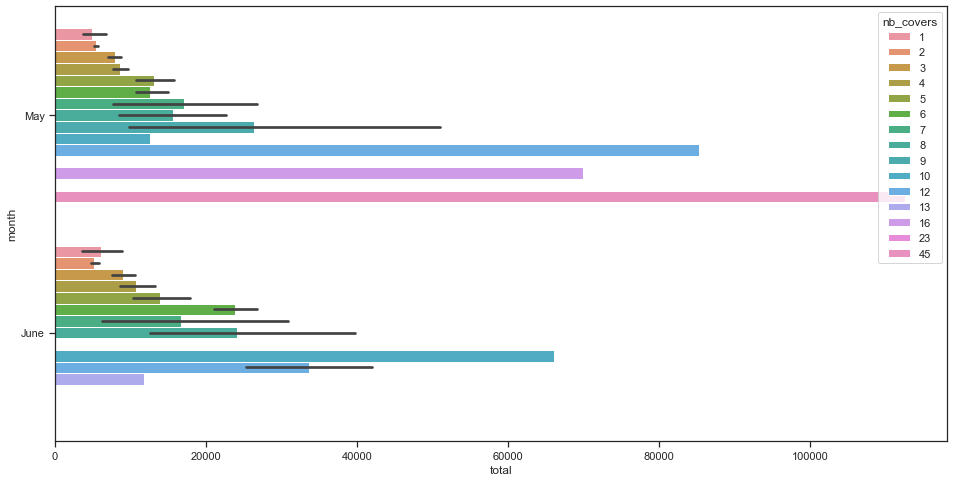

In [80]:
sns.barplot(y="month", x="total", data=df, hue="nb_covers")

<AxesSubplot:xlabel='total', ylabel='day'>

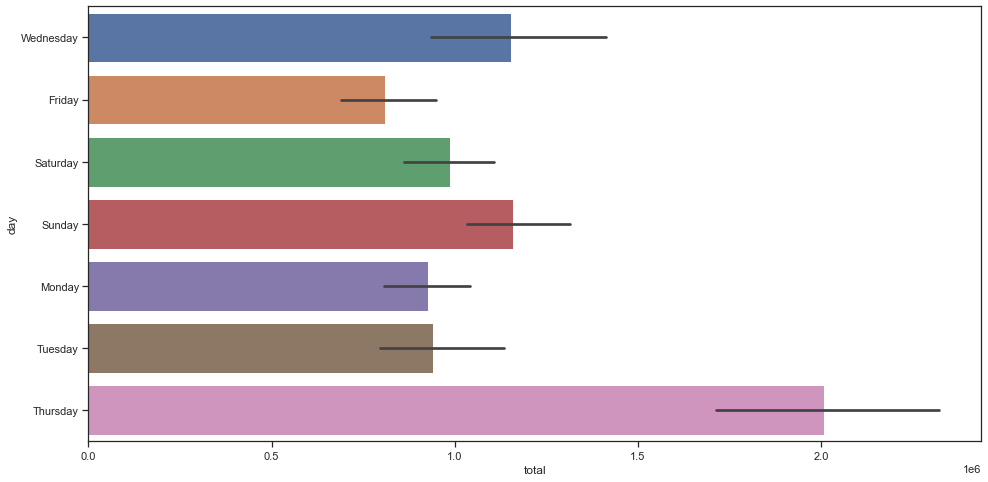

In [81]:
sns.barplot(y="day", x="total", data=df, estimator=np.sum)

<AxesSubplot:xlabel='total_by_person', ylabel='day'>

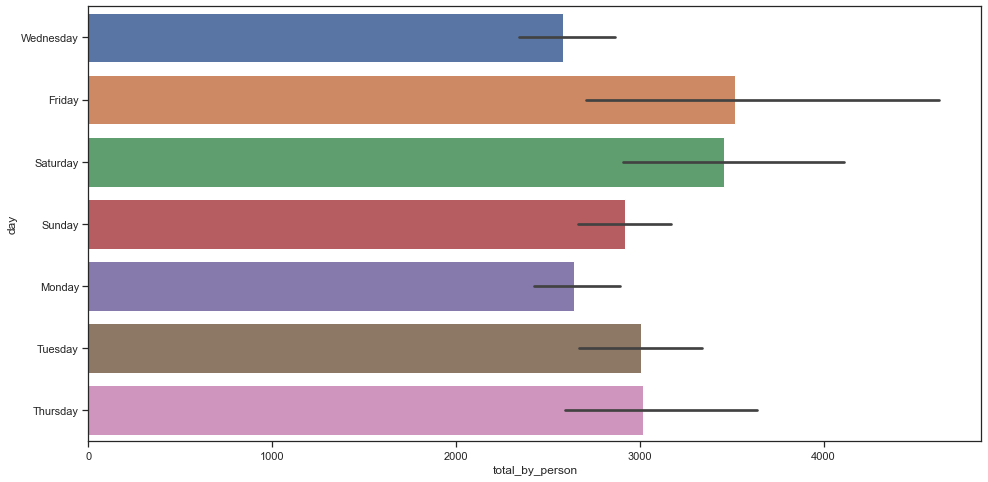

In [85]:
sns.barplot(y="day", x="total_by_person", data=df, estimator=np.mean)

<AxesSubplot:xlabel='total_by_person', ylabel='month'>

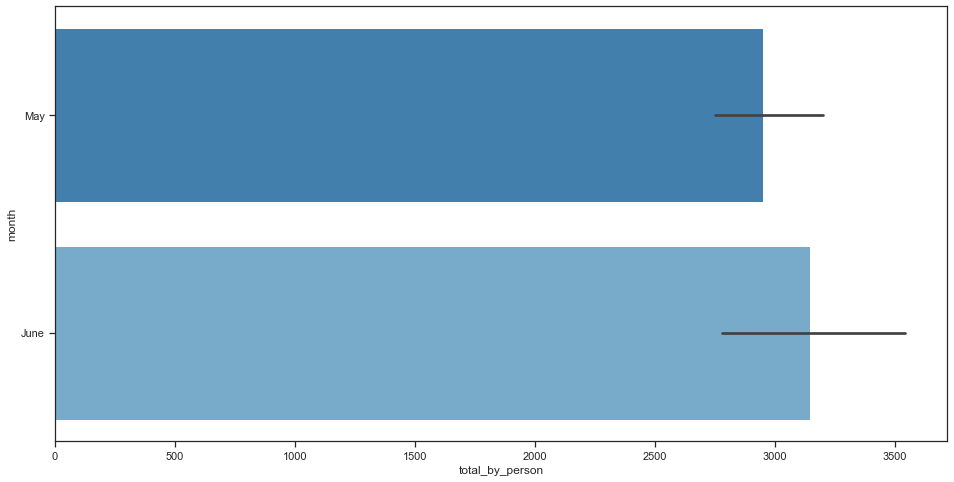

In [86]:
sns.barplot(y="month", x="total_by_person", data=df, estimator=np.mean, palette="tab20c")

<AxesSubplot:xlabel='day', ylabel='total_by_person'>

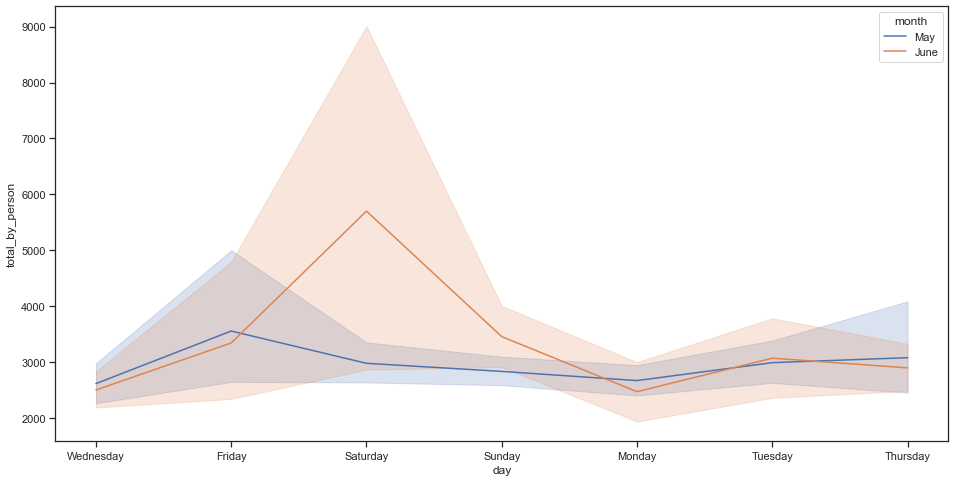

In [90]:
sns.lineplot(x="day", y="total_by_person", data=df, hue="month")

<AxesSubplot:xlabel='day', ylabel='total'>

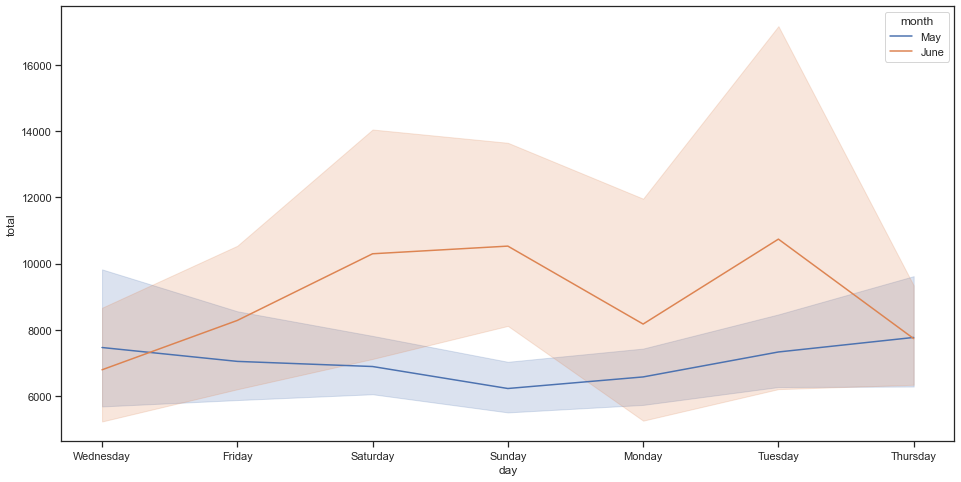

In [91]:
sns.lineplot(x="day", y="total", data=df, hue="month")

<AxesSubplot:xlabel='hour', ylabel='total'>

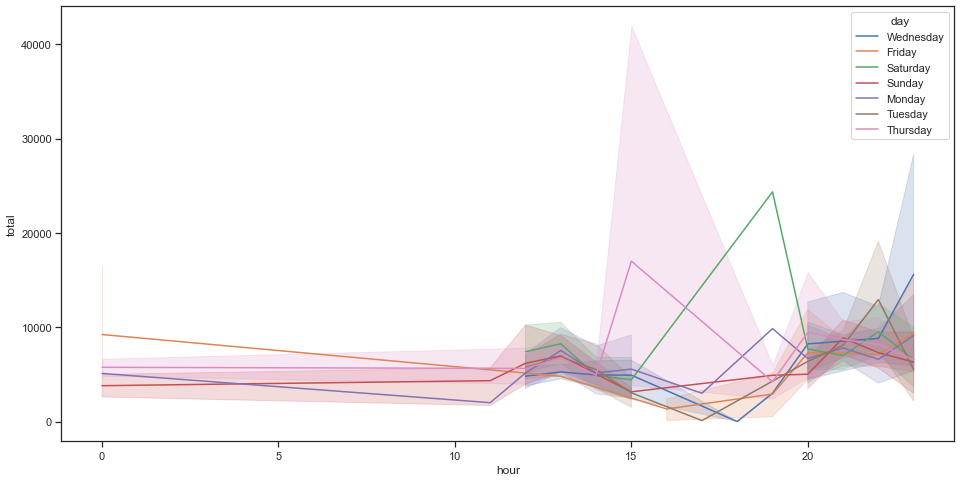

In [106]:
sns.lineplot(x="hour", y="total", data=df, hue="day")

<AxesSubplot:xlabel='hour', ylabel='total'>

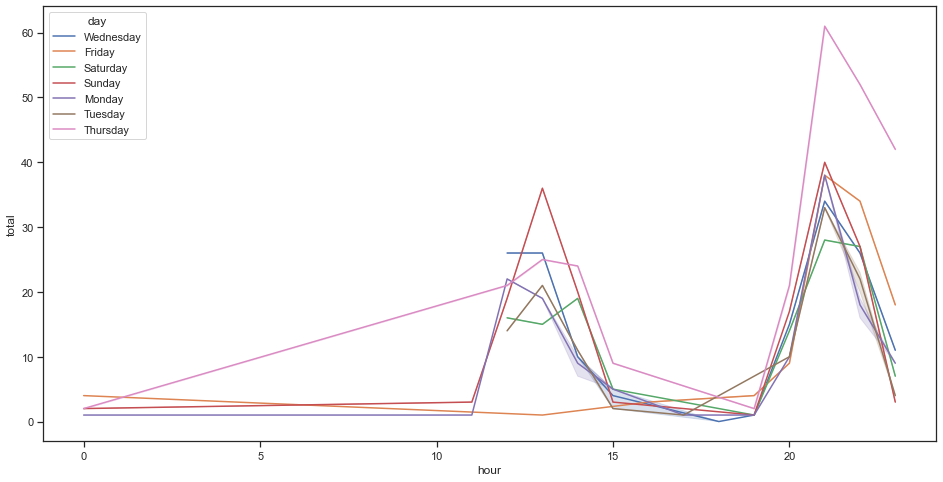

In [108]:
sns.lineplot(x="hour", y="total", data=df, hue="day", estimator=np.count_nonzero)

In [ ]:
df = pd.read_sql_query(
    """
SELECT Sells.date, Menu.name, MenuCategory.name AS "category", SellItems.quantity, Menu.price, SellItems.total  FROM Sells JOIN SellItems ON Sells._id=SellItems.id_sell JOIN Menu ON SellItems.id_product=Menu._id JOIN MenuCategory ON Menu.category_id=MenuCategory._id;
""",
    db.conn,
)
df.head()

,date,name,category,quantity,price,total
0,2022-05-04 21:42:13,Salade César,1 Entrées froides,1.0,700.0,700.0
1,2022-05-04 21:42:13,Ravioli en salade,1 Entrées froides,1.0,800.0,800.0
2,2022-05-04 21:52:26,Ravioli en salade,1 Entrées froides,1.0,800.0,800.0
3,2022-05-04 21:52:26,Chartreuse d'aubergine,1 Entrées froides,1.0,900.0,900.0
4,2022-05-06 16:39:39,Salade César,1 Entrées froides,1.0,700.0,700.0


In [3]:
import plotly.express as px

In [4]:
df = pd.read_sql_query("SELECT date_start, date_end, Workers.name FROM Pointer JOIN Workers ON Pointer.id_worker=Workers._id", db.conn)

In [5]:
df.head()

,date_start,date_end,name
0,2022-04-10 16:42:13,2022-04-10 16:42:35,Administrator
1,2022-04-10 16:42:13,2022-04-10 16:42:35,Administrator
2,2022-04-16 15:59:03,2022-04-16 16:41:53,Administrator
3,2022-04-16 16:59:46,2022-04-16 17:00:31,Administrator
4,2022-04-16 17:03:13,2022-04-16 18:39:44,Administrator


In [7]:
fig = px.timeline(df, x_start="date_start", x_end="date_end", y="name", height=400)
fig.show()